## TurtleBot in Gazebo

In [11]:
%%bash --bg
roslaunch turtlebot_gazebo turtlebot_world.launch

Starting job # 0 in a separate thread.


In [1]:
import rospy
from sensor_msgs.msg import Image
from cv_bridge import CvBridge, CvBridgeError

bridge = CvBridge()

In [2]:
rospy.init_node('turtlebot_camera')

In [3]:
def callback_color(msg):
    global color_img
    global color_timestamp
    color_timestamp = msg.header.stamp
    color_img = bridge.imgmsg_to_cv2(msg, "rgb8")

def callback_depth(msg):
    global depth_img
    global depth_timestamp
    depth_timestamp = msg.header.stamp
    depth_img = bridge.imgmsg_to_cv2(msg, "32FC1")

In [8]:
subscriber_color = rospy.Subscriber("/camera/rgb/image_rect_color", Image, callback_color)
subscriber_depth = rospy.Subscriber("/camera/depth/image_rect", Image, callback_depth)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'color_img' is not defined

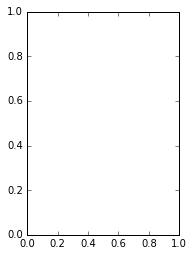

In [10]:
plt.subplot(121);
plt.imshow(color_img);
plt.axis('off');
plt.subplot(122);
plt.imshow(depth_img, cmap='gray');
plt.axis('off');